In [22]:
using Plots
using ColorSchemes
using LinearAlgebra

In [32]:
include("utils.jl")
include("behaviours.jl")

ss2BT_hankel (generic function with 2 methods)

In [2]:
n = 5
m = 2
p = 3
sys = drss(n,m,p)

StateSpace{Discrete{Float64}, Float64}
A = 
  0.1646633799722419    0.636377430028544    -0.06097600666685843   1.5471792190484428   1.7302104942442107
  1.0415211443166414    0.6907549869411916    0.950545978853883    -0.6890979439479841  -1.318263399732687
  0.26071162117975827   0.21852243668069726   0.4003769088109063    0.646920421004006    0.4058890059908837
 -2.3560597818463154   -2.841543439488998    -1.954118079026173    -2.5454830946668516  -1.9933651840351774
  1.835157194044644     2.4624117104204455    1.6335722933216683    2.431596209571616    2.2379155741181056
B = 
  1.1246518191981782  -0.7045571121211094
 -0.7974744405779582   1.6792492494259632
  0.1669080559917086   0.4841613399684359
 -1.2080056065081948  -0.7054342352481832
  0.5198413251822118  -2.7242503257129744
C = 
  2.1561837031003295  -0.9401816291164365   0.0                  0.8198830636711293    0.0
 -0.2214459580700062  -0.4213365616970915  -0.9355452311193899  -1.075236092502185    -0.15382753134495003

In [33]:
T = 10
ℬ_1 = ss2BT_modelbased(sys, nothing, T)
ℬ_2 = ss2BT_datadriven(sys, T)
ℬ_3 = ss2BT_hankel(sys, T)

50×25 Matrix{Float64}:
 -0.0113064    0.00380909   0.00144676  …  -0.147758     0.248769
 -0.0252265   -0.00129099  -0.00941542      0.00514955  -0.00713947
  0.0194729   -0.0648819   -0.462187       -0.00313553  -0.122593
  0.0037247    0.187324    -0.0453577       0.238265    -0.581434
  0.091321    -0.303679     0.288916        0.159094    -0.425354
 -0.00986668   0.00396314   0.0214848   …  -0.0669979    0.0979293
 -0.0140486   -0.00187768   0.00822274      0.0220979    0.00657519
  0.0644479   -0.445002     0.189905        0.0199416    0.0601843
 -0.150191    -0.075685    -0.0790351       0.0800312   -0.20644
  0.301754     0.305113     0.281097       -0.0209104    0.0787967
 -0.00913029   0.0230475   -0.00442475  …   5.17043e-5   0.0788119
 -0.00688079   0.0122565    0.00821005     -0.0314893   -0.0483252
  0.400661     0.239225     0.144079        0.0159656   -0.0461458
  ⋮                                     ⋱               
 -0.0278866    0.0252625   -0.116005       -0.0332921

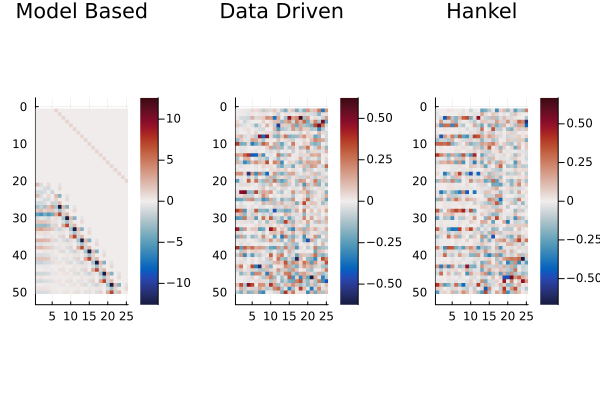

In [34]:
v1 = maximum(abs.(ℬ_1))
v2 = maximum(abs.(ℬ_2))
v3 = maximum(abs.(ℬ_3))
cmap = :balance
p1 = heatmap(ℬ_1, yflip=true, title="Model Based", 
color = cmap, clims=(-v1,v1), aspect_ratio=:equal)
p2 = heatmap(ℬ_2, yflip=true, title="Data Driven", 
color = cmap, clims=(-v2,v2), aspect_ratio=:equal)
p3 = heatmap(ℬ_3, yflip=true, title="Hankel", 
color = cmap, clims=(-v3,v3), aspect_ratio=:equal)
plot(p1, p2, p3, layout=(1,3))

In [35]:
rank(ℬ_1), rank(ℬ_2), rank(ℬ_3), T*m + n

(25, 25, 25, 25)

In [36]:
[
    rank(ℬ_1) == rank([ℬ_1 ℬ_3])
    rank(ℬ_1) == rank([ℬ_1 ℬ_2])
    rank(ℬ_2) == rank([ℬ_2 ℬ_3])
]

3-element Vector{Bool}:
 0
 0
 0

In [37]:
rank([ℬ_1 ℬ_3]), rank([ℬ_1 ℬ_2]), rank([ℬ_2 ℬ_3])

(50, 50, 31)